# Ecuación de Bellman para el valor acción-estado

Esta ecuación evalúa el "valor" de tomar una acción específica (a) en un estado particular (s). Estima cuánto retorno esperado puedes obtener al realizar esa acción en ese estado y luego seguir una política determinada.   

En este caso, el enfoque de esta ecuación se centra en la "bondad" de las acciones en estados específicos.   

Se utiliza para aprender qué acciones son óptimas en cada estado. Es fundamental en algoritmos como Q-learning.

La ecuación, en este caso, se desglosa a continuación y su explicación es la siguiente:    

El valor **q** del estado **s** y la acción **a (q(s, a))** debe ser igual a la recompensa **R** obtenida al ejecutar esa acción, más el valor **q** de ejecutar la mejor acción posible **a’** desde el próximo estado **s’**, multiplicado por un factor de descuento γ (discount factor *gamma*), que es un valor con rango *γ ∈ (0, 1]*. Este valor **γ** se usa para decidir cuánto peso le queremos dar a las recompensas a corto y a largo plazo, y es un hiperparámetro que debemos decidir nosotros.

![Bellman_1](https://user-images.githubusercontent.com/44867923/141012209-d05f4699-fd8f-48b9-9e9a-a574687e7d75.jpg)
![Bellman_2](https://user-images.githubusercontent.com/44867923/141012134-09ff0d88-4ce9-43af-8b04-d535cf24d897.jpg)

In [2]:
import gymnasium as gym
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

### Creando el entorno: "Frozen-Lake" determinístico 

In [3]:
env = gym.make("FrozenLake-v1", is_slippery=True) # el parametro is_slippery es para que el ambiente sea resbaladizo!!

### Creando la Tabla Q: Un valor de cada acción en cada estado.

In [ ]:
Q = np.zeros((env.observation_space.n, env.action_space.n))
# en este caso, la tabla Q es de 16x4, ya que hay 16 estados y 4 acciones posibles
Q

array([[0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.]])

### Agente: jugando en el entorno y actualizando la tabla Q

In [ ]:
gamma = 0.9
for ep in range(1000): # episodios, sobre un maximo de 1000.
    obs, _ = env.reset()
    done = False

    while not done: # acciones que se ejecutan en un episodio, mientas este no haya terminado

        action = env.action_space.sample() # seleccionamos una accion aleatoria

        # los valores obtenidos son la observacion, la recompensa, si el episodio termino, y dos valores que no nos interesan
        next_obs, reward, done, _ , _ = env.step(action) 


        actual_obs_action_value = reward + gamma*Q[next_obs].max() # aplicamos la ecuacion de bellman, que es la que nos dice como actualizar los valores de Q
        Q[obs, action] = actual_obs_action_value # actualizamos el valor de Q

        obs = next_obs


### Graficando la tabla Q: valor de la acción para cada estado

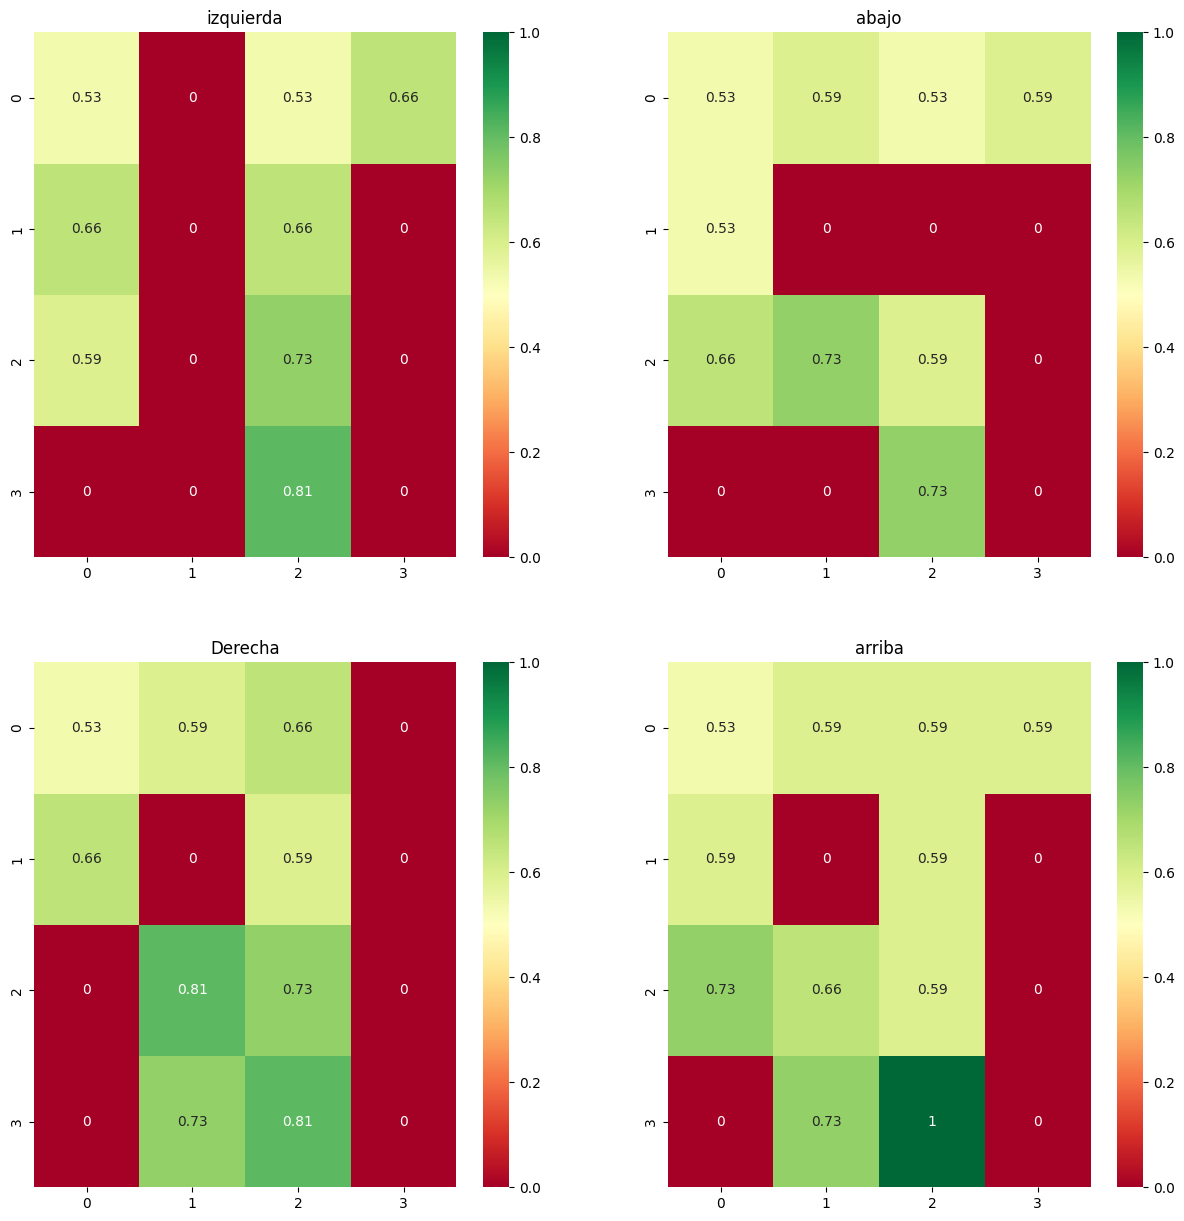

In [6]:
fig, ax = plt.subplots(2,2, figsize=(15,15))

plot = ax[0,0]
plot.set_title("izquierda")
values = Q.T[0].reshape(4,4)
sns.heatmap(values, cmap="RdYlGn", annot=True, ax=plot, vmax=1)

plot = ax[0,1]
plot.set_title("abajo")
values = Q.T[1].reshape(4,4)
sns.heatmap(values, cmap="RdYlGn", annot=True, ax=plot, vmax=1)

plot = ax[1,0]
plot.set_title("Derecha")
values = Q.T[2].reshape(4,4)
sns.heatmap(values, cmap="RdYlGn", annot=True, ax=plot, vmax=1)

plot = ax[1,1]
plot.set_title("arriba")
values = Q.T[3].reshape(4,4)
sns.heatmap(values, cmap="RdYlGn", annot=True, ax=plot, vmax=1)

_ = plt.plot()

### Graficando la Tabla Q*: acción con mayor valor para cada estado (```Q.max()```)

<Axes: >

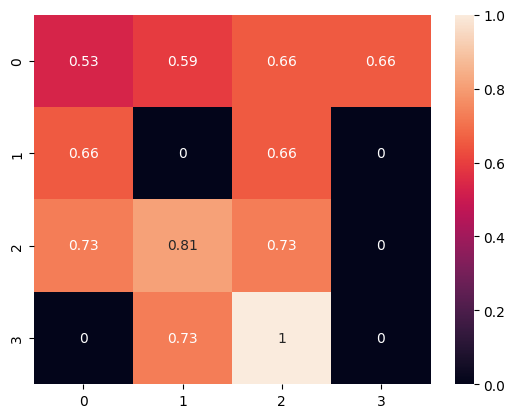

In [7]:
sns.heatmap(data=Q.max(axis=1).reshape(4,4), annot=True)